Linear Kernel Accuracy: 0.9000
RBF Kernel Accuracy: 0.9333


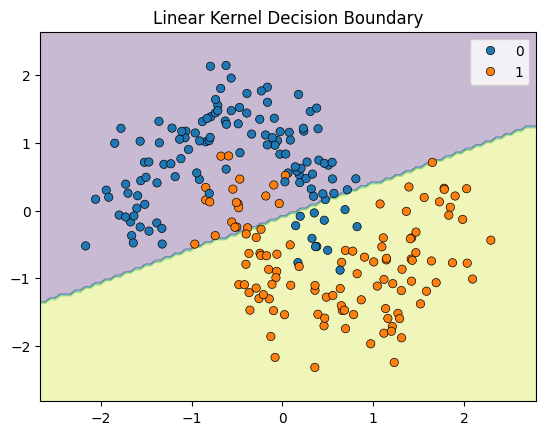

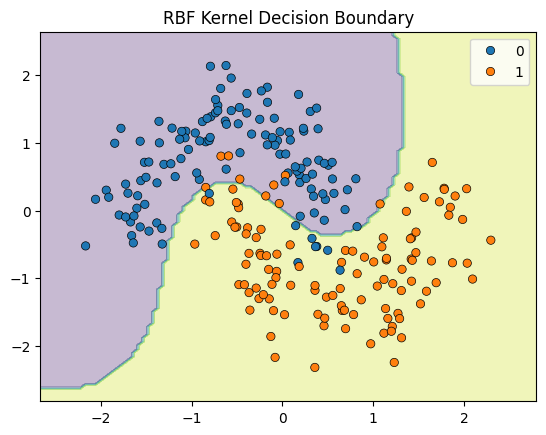

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc_linear = SVC(kernel='linear', random_state=42)
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_linear.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

y_pred_linear = svc_linear.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {acc_linear:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svc_linear, X_train, y_train, "Linear Kernel Decision Boundary")
plot_decision_boundary(svc_rbf, X_train, y_train, "RBF Kernel Decision Boundary")